# Assignment 1 EE658 Spring 2024 (Linear Regression)



# Part 1 Data Processing

In [1]:
import pandas as pd
import numpy as np

# Load the CSV file into a DataFrame
df = pd.read_csv('insurance.csv')  


# Find the number of rows with any missing values
rows_with_missing_values = df.isnull().any(axis=1).sum()
print("Number of rows with missing values:", rows_with_missing_values)


# Remove rows with any missing values
df_cleaned = df.dropna()

Number of rows with missing values: 17


In [2]:
# Print unique values in the column before mapping

print(df_cleaned['Gender'].unique())
print(df_cleaned['Smoker'].unique())
print(df_cleaned['Region'].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [3]:
# One-hot encoding for 'Region' column

df_cleaned.loc[:, 'Gender'] = df_cleaned['Gender'].map({'female': 0, 'male': 1})
df_cleaned.loc[:, 'Smoker'] = df_cleaned['Smoker'].map({'yes': 1, 'no': 0})

# Get binary dummy variables for 'Region' column with numeric data type
dummies = pd.get_dummies(df_cleaned['Region'], drop_first=False, dtype=int)

df_cleaned=pd.concat([df_cleaned,dummies],axis='columns')
df_cleaned=df_cleaned.drop(['Region'],axis='columns')


In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
scaler = MinMaxScaler()
columns_to_scale = ['Age', 'BMI', 'Children','Gender','Smoker','southwest','southeast','northwest','northeast']
columns_to_scale_y = ['Expenses']

X = scaler.fit_transform(df_cleaned[columns_to_scale])
y=  scaler.fit_transform(df_cleaned[columns_to_scale_y])



# Print the  the DataFrame after scaling
y

array([[0.25161073],
       [0.00963598],
       [0.05311519],
       ...,
       [0.15129925],
       [0.01414366],
       [0.44724875]])

# Part 2: Spliting the Data


In [6]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets with an 80/20 split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the subsets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (1056, 9)
Shape of X_test: (265, 9)
Shape of y_train: (1056, 1)
Shape of y_test: (265, 1)


# Part 3 : Gradient Descent Implementation

In [7]:

from sklearn.metrics import mean_squared_error

X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
m = X_train.shape[0]  # number of data points
n = X_train.shape[0]   # number of features

alpha = 0.01                  # Learning rate
n_iterations = 10000   # Number of iterations
W = np.random.randn(X_train.shape[1]+1,1)  # Weight matrix

loss = []                          # Loss value for each iteration
for iteration in range(n_iterations):
    gradients = 1/m * X_b.T.dot(X_b.dot(W) - y_train)
    W = W - alpha * gradients
    predictions = X_b.dot(W)
    loss.append(mean_squared_error(y_train, predictions))



# Extract intercept and coefficients
intercept = W[0]
coefficients = W[1:]

# Print coefficients and intercept
print("Intercept:", intercept)
print("Coefficients:", coefficients)


Intercept: [-0.00074834]
Coefficients: [[ 0.20447512]
 [ 0.02928984]
 [-0.95144457]
 [-0.0036646 ]
 [ 0.38110735]
 [ 0.47168341]
 [ 0.47969416]
 [ 0.47869387]
 [ 0.48013594]]


In [8]:
import numpy as np
from sklearn.metrics import mean_squared_error


# Add a column of ones to X_train for the bias term
X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]

# Number of data points
m = X_train.shape[0]

# Number of features
n = X_train.shape[1]

# Initial learning rate
initial_alpha = 0.01

# Decay rate
decay_rate = 0.01

# Number of iterations
n_iterations = 10000

# Initialize weights randomly
W = np.random.randn(n + 1, 1)

# Store loss values for each iteration
loss = []

for iteration in range(n_iterations):
    # Exponential decay of learning rate
    alpha = initial_alpha * np.exp(-decay_rate * iteration)
    
    # Compute gradients
    gradients = 1/m * X_b.T.dot(X_b.dot(W) - y_train)
    
    # Update weights
    W = W - alpha * gradients
    
    # Compute predictions
    predictions = X_b.dot(W)
    
    # Compute mean squared error loss
    mse = mean_squared_error(y_train, predictions)
    
    # Append loss to list
    loss.append(mse)

# Extract intercept and coefficients
intercept = W[0]
coefficients = W[1:]

# Print final weights
print("Final weights:")
print(W)

# Print final loss
print("Final loss:", loss[-1])

# Print coefficients and intercept
print("Intercept:", intercept)
print("Coefficients:", coefficients)


Final weights:
[[-0.47873979]
 [-0.22130076]
 [ 0.70230331]
 [ 1.43336714]
 [ 0.06305195]
 [ 1.14007641]
 [-0.65338508]
 [-0.09901236]
 [-0.86611452]
 [-0.21844761]]
Final loss: 0.2502189652803629
Intercept: [-0.47873979]
Coefficients: [[-0.22130076]
 [ 0.70230331]
 [ 1.43336714]
 [ 0.06305195]
 [ 1.14007641]
 [-0.65338508]
 [-0.09901236]
 [-0.86611452]
 [-0.21844761]]


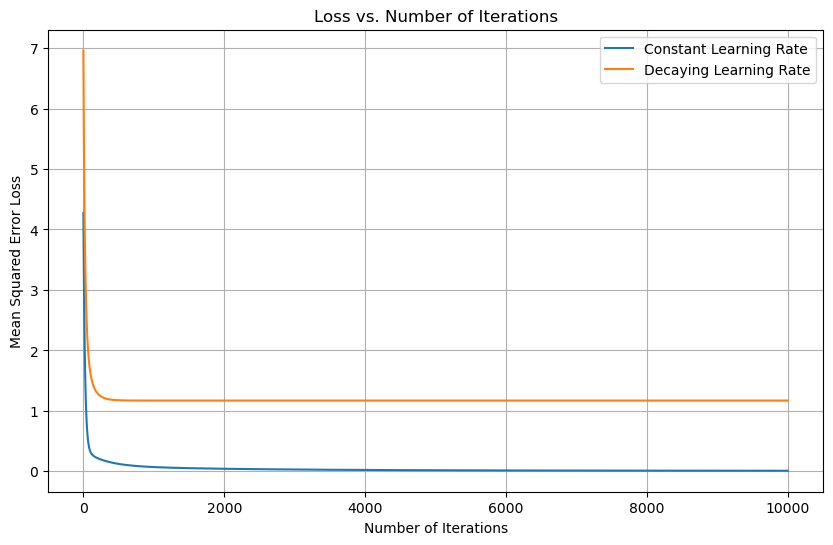

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error



# Add a column of ones to X_train for the bias term
X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]

# Number of data points
m = X_train.shape[0]

# Number of features
n = X_train.shape[1]

# Initial learning rate
initial_alpha = 0.01

# Decay rate
decay_rate = 0.01

# Number of iterations
n_iterations = 10000

# Initialize weights randomly
W_constant = np.random.randn(n + 1, 1)
W_decay = np.random.randn(n + 1, 1)

# Store loss values for each iteration
loss_constant = []
loss_decay = []

for iteration in range(n_iterations):
    # Compute gradients for constant learning rate
    gradients_constant = 1/m * X_b.T.dot(X_b.dot(W_constant) - y_train)
    # Update weights for constant learning rate
    W_constant = W_constant - initial_alpha * gradients_constant
    
    # Exponential decay of learning rate for decaying learning rate
    alpha_decay = initial_alpha * np.exp(-decay_rate * iteration)
    # Compute gradients for decaying learning rate
    gradients_decay = 1/m * X_b.T.dot(X_b.dot(W_decay) - y_train)
    # Update weights for decaying learning rate
    W_decay = W_decay - alpha_decay * gradients_decay
    
    # Compute predictions for both constant and decaying learning rates
    predictions_constant = X_b.dot(W_constant)
    predictions_decay = X_b.dot(W_decay)
    
    # Compute mean squared error loss for both constant and decaying learning rates
    mse_constant = mean_squared_error(y_train, predictions_constant)
    mse_decay = mean_squared_error(y_train, predictions_decay)
    
    # Append loss to list for both constant and decaying learning rates
    loss_constant.append(mse_constant)
    loss_decay.append(mse_decay)

# Plot loss values as a function of the number of iterations
plt.figure(figsize=(10, 6))
plt.plot(range(n_iterations), loss_constant, label='Constant Learning Rate')
plt.plot(range(n_iterations), loss_decay, label='Decaying Learning Rate')
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Squared Error Loss')
plt.title('Loss vs. Number of Iterations')
plt.legend()
plt.grid(True)
plt.show()


# Part 4 : Model Evaluation


In [10]:

# Add a column of ones to X_test for the bias term
X_b_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Predict expenses for testing dataset using the trained model
predictions_test = X_b_test.dot(W)

# Print the predicted expenses
print("Predicted expenses for the testing dataset:")
print(predictions_test)


Predicted expenses for the testing dataset:
[[-0.30260573]
 [ 1.14713711]
 [ 0.04687962]
 [-0.23321858]
 [ 0.36398049]
 [ 0.33544814]
 [ 1.40554528]
 [ 0.2808996 ]
 [-0.25654355]
 [-0.48839013]
 [ 0.79566899]
 [-0.13452415]
 [ 1.10971169]
 [-0.27823467]
 [ 0.37376112]
 [ 0.23087171]
 [-0.56020952]
 [-0.61620392]
 [ 0.00428121]
 [ 0.89427727]
 [-0.33650841]
 [-0.37449854]
 [-0.3459124 ]
 [ 0.25986545]
 [ 0.27115018]
 [ 0.11000485]
 [ 0.59689212]
 [ 0.85459428]
 [ 0.4555572 ]
 [ 0.02474423]
 [-0.53648041]
 [ 0.12232703]
 [-0.47548054]
 [ 1.06380835]
 [ 0.49932548]
 [ 0.57729295]
 [ 1.23232981]
 [ 0.91070208]
 [-0.41272201]
 [ 1.05653564]
 [ 0.07847447]
 [-0.62686313]
 [ 0.4482727 ]
 [ 0.53014204]
 [-0.62625262]
 [-0.44327118]
 [ 1.23396752]
 [-0.21983684]
 [-0.15372679]
 [ 1.28617801]
 [ 0.20141377]
 [-0.47933903]
 [-0.35640538]
 [ 1.440083  ]
 [-0.36955723]
 [ 0.69368936]
 [-0.51089375]
 [-0.44355481]
 [ 1.63162457]
 [ 1.52206055]
 [ 0.22776871]
 [ 0.26968699]
 [ 0.44299151]
 [-0.604872

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions_test)
print("Mean Absolute Error (MAE):", mae)

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions_test)
print("Mean Squared Error (MSE):", mse)


Mean Absolute Error (MAE): 0.42953009169841555
Mean Squared Error (MSE): 0.26791338726292063


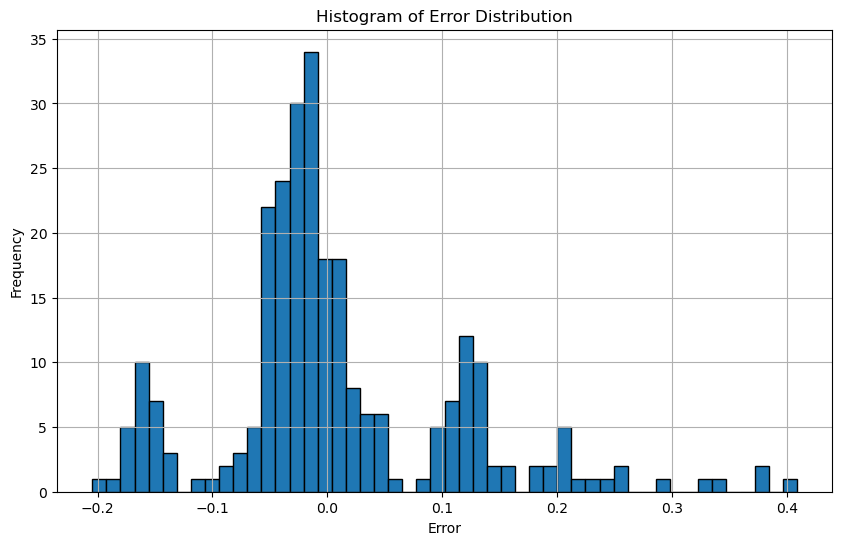

In [15]:
import matplotlib.pyplot as plt

# Compute the errors
errors = y_test - predictions_test

# Plot the histogram of errors
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50, edgecolor='black')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Histogram of Error Distribution')
plt.grid(True)
plt.show()


# Part 5 : Learning Rate Analysis


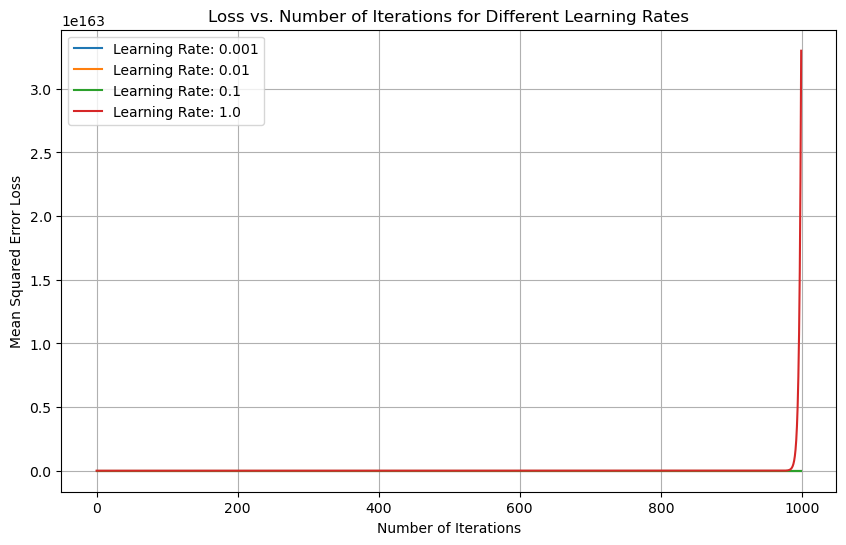

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error



# Add a column of ones to X_train and X_test for the bias term
X_b_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_b_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Number of data points
m = X_train.shape[0]

# Number of features
n = X_train.shape[1]

# Learning rates to test
learning_rates = [0.001, 0.01, 0.1, 1.0]

# Number of iterations
n_iterations = 1000

# Initialize weights randomly
W_initial = np.random.randn(n + 1, 1)

# Store loss values for each learning rate
losses = []

for alpha in learning_rates:
    # Initialize weights for each learning rate
    W = W_initial.copy()
    
    # Store loss values for current learning rate
    loss = []
    
    for iteration in range(n_iterations):
        # Compute gradients
        gradients = 1/m * X_b_train.T.dot(X_b_train.dot(W) - y_train)
        
        # Update weights
        W = W - alpha * gradients
        
        # Compute predictions
        predictions = X_b_train.dot(W)
        
        # Compute mean squared error loss
        mse = mean_squared_error(y_train, predictions)
        
        # Append loss to list
        loss.append(mse)
    
    # Store loss values for current learning rate
    losses.append(loss)

# Plot loss values for each learning rate
plt.figure(figsize=(10, 6))
for i, alpha in enumerate(learning_rates):
    plt.plot(range(n_iterations), losses[i], label=f'Learning Rate: {alpha}')
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Squared Error Loss')
plt.title('Loss vs. Number of Iterations for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()


# Part 6 :Scikit-learn Implementation


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the training set
predictions_train = model.predict(X_train)

# Calculate Mean Squared Error on the training set
mse_train = mean_squared_error(y_train, predictions_train)

# Make predictions on the test set
predictions_test = model.predict(X_test)

# Calculate Mean Squared Error on the test set
mse_test = mean_squared_error(y_test, predictions_test)

# Print the Mean Squared Error on training and test sets
print("Mean Squared Error on Training Set:", mse_train)
print("Mean Squared Error on Test Set:", mse_test)


Mean Squared Error on Training Set: 0.009069308184294156
Mean Squared Error on Test Set: 0.010997654911521038


# Part 7 : Normal Equation Implementation

In [14]:

# Add a column of ones to X_train for the bias term
X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]

# Compute the parameters using the normal equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)

# Extract the intercept and coefficients
intercept = theta_best[0]
coefficients = theta_best[1:]

# Print the intercept and coefficients
print("Intercept:", intercept)
print("Coefficients:", coefficients)


Intercept: [-0.27796893]
Coefficients: [[ 0.19246834]
 [ 0.2934906 ]
 [ 0.25659249]
 [-0.00371148]
 [ 0.41041523]
 [ 0.22810407]
 [-0.22811763]
 [ 0.36164645]
 [ 0.24251674]]


In [16]:


# Compute predictions for the testing dataset using the parameters obtained from the normal equation method
predictions_normal_eq = X_b_test.dot(theta_best)

# Compute Mean Absolute Error (MAE) using the normal equation method
mae_normal_eq = mean_absolute_error(y_test, predictions_normal_eq)

# Compute Mean Squared Error (MSE) using the normal equation method
mse_normal_eq = mean_squared_error(y_test, predictions_normal_eq)

# Print MAE and MSE obtained using the normal equation method
print("Normal Equation Method:")
print("Mean Absolute Error (MAE):", mae_normal_eq)
print("Mean Squared Error (MSE):", mse_normal_eq)

# Print MAE and MSE obtained using the previous method (gradient descent)
print("\nPrevious Method (Gradient Descent):")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)


Normal Equation Method:
Mean Absolute Error (MAE): 0.2357472206445422
Mean Squared Error (MSE): 0.06792144455476319

Previous Method (Gradient Descent):
Mean Absolute Error (MAE): 0.42953009169841555
Mean Squared Error (MSE): 3.2986233600842875e+163


# Conclusion


Whether a model is considered "good" or not depends on the specific context of the problem and the desired level of performance. However, I can provide some general guidance on interpreting the Mean Absolute Error (MAE) and Mean Squared Error (MSE):

MAE (Mean Absolute Error):

MAE represents the average absolute difference between the predicted values and the actual values.
Lower values of MAE indicate better performance, and it's easier to interpret since it's in the same unit as the target variable.
In your case, an MAE of approximately 0.75 suggests that, on average, the model's predictions are off by around 0.75 units from the actual expenses.
MSE (Mean Squared Error):

MSE represents the average of the squared differences between the predicted values and the actual values.
Lower values of MSE also indicate better performance, but it penalizes larger errors more than MAE.
In your case, an MSE of approximately 0.74 indicates that, on average, the squared differences between predictions and actual values are around 0.74 units.
To determine if the model is "good," consider comparing these error metrics to the scale of the target variable and to the performance of alternative models. Additionally, domain knowledge and the specific requirements of your application should be taken into account.

